In [1]:
cd drive/MyDrive/Dacon/LDI/Model

/content/drive/MyDrive/Dacon/LDI/Model


In [2]:
import pickle
import pandas as pd
import numpy as np
with open('../Preprocessed_data/v2/withProblemList.txt', 'rb') as f:
    problem_df = pickle.load(f)
with open('../Preprocessed_data/v2/noProblemList.txt', 'rb') as f:
    no_problem_df = pickle.load(f)

In [3]:
problem_df

,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,errtype_10,errtype_11,errtype_12,errtype_13,errtype_14,errtype_15,errtype_16,errtype_17,errtype_18,errtype_19,errtype_20,errtype_21,errtype_22,errtype_23,errtype_24,errtype_25,errtype_26,errtype_27,errtype_28,errtype_30,errtype_31,errtype_32,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42,errtype_23_ac,errtype_23_as,errtype_23_ct,errtype_31_0,errtype_40_0,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0,1.0,3.0,3.0,1.0,3.0,47.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,17.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,68.0,47.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,1.0,0.0,35.0,0.0,0.0,0.0,36.0,0.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,17.0,5.0,6.0,8.0,4.0,44.0,4.0,-3.0,-3.0,-3.0,0.0,0.0,-3.0,-3.0,0.0,0.0,0.0,0.0,-3.0,0.0
2,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,7.0,9.0,2.0,4.0,63.0,41.0,0.0,0.0,0.0,0.0,0.0,1508.0,155.0,0.0,0.0,17.0,0.0,0.0,0.0,31.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0,1577.0,37.0,29.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,35.0,30.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,30.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,0.0,0.0,0.0,1.0,81.0,0.0,1.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,74.0,51.0,1.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,46.0,0.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,91.0,0.0,1.0,6.0,2.0,19.0,52.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5425,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,72.0,63.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,43.0,0.0,5.0,13.0,0.0,0.0,0.0,0.0,6.0,39.0,0.0,0.0,0.0,0.0,3.0,42.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5426,0.0,0.0,0.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5427,0.0,0.0,1.0,71.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,1.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
no_problem_df

,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,errtype_10,errtype_11,errtype_12,errtype_13,errtype_14,errtype_15,errtype_16,errtype_17,errtype_18,errtype_19,errtype_20,errtype_21,errtype_22,errtype_23,errtype_24,errtype_25,errtype_26,errtype_27,errtype_28,errtype_30,errtype_31,errtype_32,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42,errtype_23_ac,errtype_23_as,errtype_23_ct,errtype_31_0,errtype_40_0,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,0.0,0.0,8.0,104.0,0.0,1.0,1.0,0.0,0.0,7.0,15.0,16.0,1.0,10.0,59.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,131.0,1.0,2.0,1.0,0.0,0.0,1.0,13.0,14.0,1.0,4.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,25.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0
2,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,45.0,30.0,1.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,32.0,0.0,8.0,0.0,0.0,1.0,1.0,2.0,0.0,9.0,1.0,0.0,0.0,12.0,7.0,33.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,7.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,0.0,79.0,56.0,13.0,0.0,0.0,0.0,0.0,2567.0,168.0,0.0,0.0,33.0,0.0,0.0,0.0,58.0,1039.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,3323.0,63.0,3.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,241.0,6.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0,123.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,-2.0,0.0
9996,0.0,0.0,4.0,92.0,4.0,4.0,4.0,0.0,0.0,0.0,14.0,18.0,0.0,6.0,47.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,2.0,5.0,5.0,0.0,0.0,0.0,5.0,10.0,5.0,8.0,26.0,18.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,13.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,4.0,8.0,4.0,0.0,18.0,4.0,-2.0,-2.0,-2.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,-2.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_x = pd.concat([problem_df,no_problem_df])
# df_x = (df_x - df_x.mean())/df_x.std()
# df_x = df_x.dropna(axis=1)

df_x

,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,errtype_10,errtype_11,errtype_12,errtype_13,errtype_14,errtype_15,errtype_16,errtype_17,errtype_18,errtype_19,errtype_20,errtype_21,errtype_22,errtype_23,errtype_24,errtype_25,errtype_26,errtype_27,errtype_28,errtype_30,errtype_31,errtype_32,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42,errtype_23_ac,errtype_23_as,errtype_23_ct,errtype_31_0,errtype_40_0,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0,1.0,3.0,3.0,1.0,3.0,47.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,17.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,68.0,47.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,1.0,0.0,35.0,0.0,0.0,0.0,36.0,0.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,17.0,5.0,6.0,8.0,4.0,44.0,4.0,-3.0,-3.0,-3.0,0.0,0.0,-3.0,-3.0,0.0,0.0,0.0,0.0,-3.0,0.0
2,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,7.0,9.0,2.0,4.0,63.0,41.0,0.0,0.0,0.0,0.0,0.0,1508.0,155.0,0.0,0.0,17.0,0.0,0.0,0.0,31.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0,1577.0,37.0,29.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,35.0,30.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,30.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,241.0,6.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0,123.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,-2.0,0.0
9996,0.0,0.0,4.0,92.0,4.0,4.0,4.0,0.0,0.0,0.0,14.0,18.0,0.0,6.0,47.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,2.0,5.0,5.0,0.0,0.0,0.0,5.0,10.0,5.0,8.0,26.0,18.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,13.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,4.0,8.0,4.0,0.0,18.0,4.0,-2.0,-2.0,-2.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,-2.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y_problem = np.zeros((problem_df.shape[0]))
y_no_problem = np.ones((no_problem_df.shape[0]))
df_y = np.concatenate((y_problem,y_no_problem))
df_y

array([0., 0., 0., ..., 1., 1., 1.])

In [10]:
from sklearn.model_selection import train_test_split
X_t, X_test, y_t, y_test = train_test_split(df_x,df_y, test_size = 0.3, random_state = 11)
X_train, X_val,y_train, y_val = train_test_split(X_t,y_t,test_size=0.2, random_state = 10)

In [11]:
y_train

array([1., 0., 0., ..., 1., 1., 1.])

In [14]:
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
eval_set=[(X_val,y_val)]
nes = [100,200,500,1000]
lrs = [0.02,0.05,0.1,0.12]
mds = [3,5,7,10]
params = []
score = 0
for ne in nes:
    for lr in lrs:
        for md in mds:
            xgb = XGBClassifier(n_estimators = ne, learning_rate = lr, max_depth = md, objective= 'binary:logistic')
            xgb.fit(X_train,y_train,eval_set = eval_set, eval_metric='auc',early_stopping_rounds = 20,verbose=False)  
            xgb_pred = xgb.predict(X_test)
            xgb_probability = xgb.predict_proba(X_test)
            xgb_prob = xgb_probability[:,1]
            temp_score = roc_auc_score(y_test,xgb_prob)
            print(temp_score)
            if temp_score > score:
                score = temp_score
                params = [ne,lr,md]
print(score)
print(params)
            


0.8901859884057806
0.9060231227513746
0.9120884556949092
0.9151909656402548
0.9032602000868533
0.9167963518391845
0.9197506598130182
0.9212613670506671
0.9125933763652929
0.9205616145134942
0.9225730862786871
0.9206876166000804
0.9140179196660165
0.9207929393418048
0.9204203056569362
0.9199102151503368
0.8995621452833455
0.9141080370071069
0.9189966746802507
0.9210367325986354
0.912023579318871
0.9205770226528032
0.9216244720178053
0.9214780946943695
0.9177713221278316
0.9209000867316053
0.9219967002253238
0.9198150293423685
0.9187029063400032
0.9212213261623312
0.9207806736519601
0.9199102151503368
0.9112510435973302
0.9202627777063687
0.9220723217511433
0.9222548879280877
0.9182288019482376
0.9218350161319164
0.9213570597053234
0.9214780946943695
0.920259736626242
0.9209000867316053
0.9219967002253238
0.9198150293423685
0.9196775725206379
0.9212213261623312
0.9207806736519601
0.9199102151503368
0.9172899191437617
0.921681644324189
0.922068672454991
0.9222548879280877
0.91971741067029

In [16]:
xgb = XGBClassifier(n_estimators = params[0], learning_rate = params[1], max_depth = params[2], objective= 'binary:logistic')
xgb.fit(X_train,y_train,eval_set = eval_set, eval_metric='auc',early_stopping_rounds = 20,verbose=False)  
xgb_pred = xgb.predict(X_test)
xgb_probability = xgb.predict_proba(X_test)
xgb_prob = xgb_probability[:,1]
temp_score = roc_auc_score(y_test,xgb_prob)

AxesSubplot(0.125,0.125;0.775x0.755)


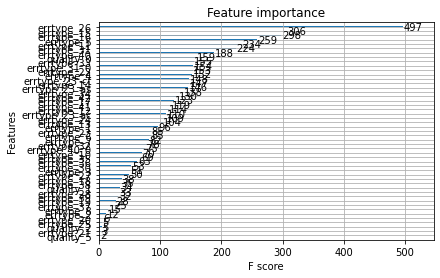

In [17]:
print(plot_importance(xgb))

In [51]:

from sklearn.metrics import roc_auc_score


roc_auc_score(y_test,xgb_pred)
roc_auc_score(y_test,xgb_prob)


0.9225730862786871

In [25]:
with open('../Preprocessed_data/v2/testdata.txt', 'rb') as f:
    testdata = pickle.load(f)

In [34]:
testdata.

(14998, 59)

In [26]:
# df_x = (df_x - df_x.mean())/df_x.std()
# testdata = df_x.dropna(axis=1)

test_pred = xgb.predict_proba(testdata)[:,1]

In [46]:
test_pred

array([0.65102535, 0.57477534, 0.9496109 , ..., 0.19776693, 0.8337454 ,
       0.6471833 ], dtype=float32)

In [48]:
res_dict = {}
for user_id in range(30000,44999):
    if user_id == 43262:
        res_dict[user_id] =0
    elif user_id < 43262:
        res_dict[user_id] = test_pred[user_id - 30000]
    else:
        res_dict[user_id] = test_pred[user_id - 30001]

In [50]:
import csv

with open('result.csv','w') as csvfile:
    fieldnames = ['user_id','problem']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(30000,44999):
        if i not in res_dict.keys():
            writer.writerow({'user_id':i,'problem':0})
        else:
            writer.writerow({'user_id':i,'problem':res_dict[i]})

In [44]:
len(res_dict)

1